In [1]:
import numpy as np
import pandas as pd

In [2]:
laptops = pd.read_csv("laptops.csv", encoding="latin-1")
laptops.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


### Clean column name

In [3]:
# This function clean a string label as we described above
def clean_label(s):
    s = s.strip();
    s = s.replace("Operating System", "os")
    s = s.replace(" ", "_")
    s = s.replace("(", "")
    s = s.replace(")", "")
    s = s.lower()
    return s
# Apply the clean function to each column name
new_label = [clean_label(label) for label in laptops.columns]
laptops.columns = new_label

### Convert Ram column into numeric

In [4]:
laptops['ram_gb'] = laptops.ram.str.slice(0, -2).astype('int')

### Convert Price column to numeric

In [5]:
# Clean the price_europe column
laptops["price_euros_num"] = laptops.price_euros.str.replace(",", ".").astype("float")

### Convert Weight column to numeric

In [6]:
# Create a new column for the cleaned data
laptops["weight_kg"] = laptops["weight"].str.replace("kg", "").str.replace("s", "").astype("float")

### Extract CPU Manufacturer

In [7]:
laptops["cpu_manufacturer"] = laptops.cpu.str.extract("(\w*) ", expand=False)

### Extract CPU Speed

In [8]:
laptops["cpu_speed_ghz"] =  laptops.cpu.str.replace("GHz", "").str.extract(" ([0-9\.]*)$").astype("float")

### Correcting Bad Values of OS column

In [9]:
mapping = {"Windows": "Windows", "No OS": "No OS", "Linux": "Linux", "Chrome OS": "Chrome OS",
           "macOS": "macOS", "Mac OS": "macOS", "Android": "Android"}
laptops['os_new'] = laptops.os.map(mapping)

### Handling missing values of OS Version column

In [10]:
laptops.loc[laptops.os_new == "No OS", "os_version"] = "Non OS"
laptops.loc[laptops.os_new == "macOS", "os_version"] = "X"
laptops.dropna(inplace=True)

In [11]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1302
Data columns (total 19 columns):
manufacturer        1212 non-null object
model_name          1212 non-null object
category            1212 non-null object
screen_size         1212 non-null object
screen              1212 non-null object
cpu                 1212 non-null object
ram                 1212 non-null object
storage             1212 non-null object
gpu                 1212 non-null object
os                  1212 non-null object
os_version          1212 non-null object
weight              1212 non-null object
price_euros         1212 non-null object
ram_gb              1212 non-null int32
price_euros_num     1212 non-null float64
weight_kg           1212 non-null float64
cpu_manufacturer    1212 non-null object
cpu_speed_ghz       1212 non-null float64
os_new              1212 non-null object
dtypes: float64(3), int32(1), object(15)
memory usage: 184.6+ KB


In [12]:
laptops.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros,ram_gb,price_euros_num,weight_kg,cpu_manufacturer,cpu_speed_ghz,os_new
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,X,1.37kg,"1339,69",8,1339.69,1.37,Intel,2.3,macOS
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,X,1.34kg,"898,94",8,898.94,1.34,Intel,1.8,macOS
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,Non OS,1.86kg,"575,00",8,575.00,1.86,Intel,2.5,No OS
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,X,1.83kg,"2537,45",16,2537.45,1.83,Intel,2.7,macOS
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,X,1.37kg,"1803,60",8,1803.60,1.37,Intel,3.1,macOS


### Convert Screen Size column to numeric

In [13]:
laptops["screen_size_inch"] = laptops['screen_size'].str.replace("\"", "").astype("float")

In [14]:
#What is the popular screen size ?
laptops.screen_size_inch.value_counts().head()

15.6    607
14.0    191
13.3    161
17.3    160
12.5     37
Name: screen_size_inch, dtype: int64

In [15]:
#What is the minimum screen size of Ultrabook ?
laptops.loc[laptops.category == "Ultrabook", "screen_size_inch"].min()

11.6

In [16]:
#What is the average screen size of gaming laptop ?
laptops.loc[laptops.category == "Gaming", "screen_size_inch"].mean()

16.352238805970146

### Extract Screen Resolution

In [17]:
laptops["screen_resolution"] = laptops.screen.str.split().apply(lambda x: x[-1])

In [18]:
#How many laptop has full hd (1920x1080) screen ?
(laptops["screen_resolution"] == "1920x1080").sum()

806

In [19]:
#What is the popular screen resolution of Macbook ?
laptops.loc[laptops.model_name.str.contains("MacBook.*"), "screen_resolution"].value_counts().head()

2304x1440    6
2560x1600    6
2880x1800    4
1440x900     2
1366x768     1
Name: screen_resolution, dtype: int64

### Extract Storage Info

In [20]:
laptops["storage_gb"] = laptops.storage.str.split().apply(lambda x: x[0]).apply(lambda x: int(x[:-2]) if x.endswith("GB") else int(x[0]) * 1024)

In [21]:
laptops["has_ssd"] = laptops.storage.str.match(".*SSD.*")

In [22]:
laptops["has_hdd"] = laptops.storage.str.match(".*HDD.*")

In [23]:
#How many laptop have ssd storage
laptops.has_ssd.sum()

816

In [24]:
# How many laptop have hdd storage
laptops.has_hdd.sum()

531

In [25]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

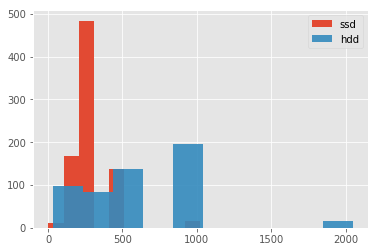

In [26]:
laptops.loc[laptops.has_ssd, "storage_gb"].hist(label='ssd')
laptops.loc[laptops.has_hdd, "storage_gb"].hist(label='hdd', alpha=0.9)
plt.legend()